<a href="https://colab.research.google.com/github/yaya0001/my_project/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv('/content/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [22]:
data['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [23]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
ord=OrdinalEncoder(categories=[['TA','ATA','NAP','ASY']])
ord2=OrdinalEncoder(categories=[['Up','Flat','Down']])
ord3=OrdinalEncoder(categories=[['Normal','LVH','ST']])
data['ChestPainType']=ord.fit_transform(data[['ChestPainType']])
data['ST_Slope']=ord2.fit_transform(data[['ST_Slope']])
data['RestingECG']=ord3.fit_transform(data[['RestingECG']])

In [24]:
data['Sex']=data['Sex'].map({'M':1,'F':0})
data['ExerciseAngina']=data['ExerciseAngina'].map({'Y':1,'N':0})

In [25]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1.0,140,289,0,0.0,172,0,0.0,0.0,0
1,49,0,2.0,160,180,0,0.0,156,0,1.0,1.0,1
2,37,1,1.0,130,283,0,2.0,98,0,0.0,0.0,0
3,48,0,3.0,138,214,0,0.0,108,1,1.5,1.0,1
4,54,1,2.0,150,195,0,0.0,122,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0.0,110,264,0,0.0,132,0,1.2,1.0,1
914,68,1,3.0,144,193,1,0.0,141,0,3.4,1.0,1
915,57,1,3.0,130,131,0,0.0,115,1,1.2,1.0,1
916,57,0,1.0,130,236,0,1.0,174,0,0.0,1.0,1


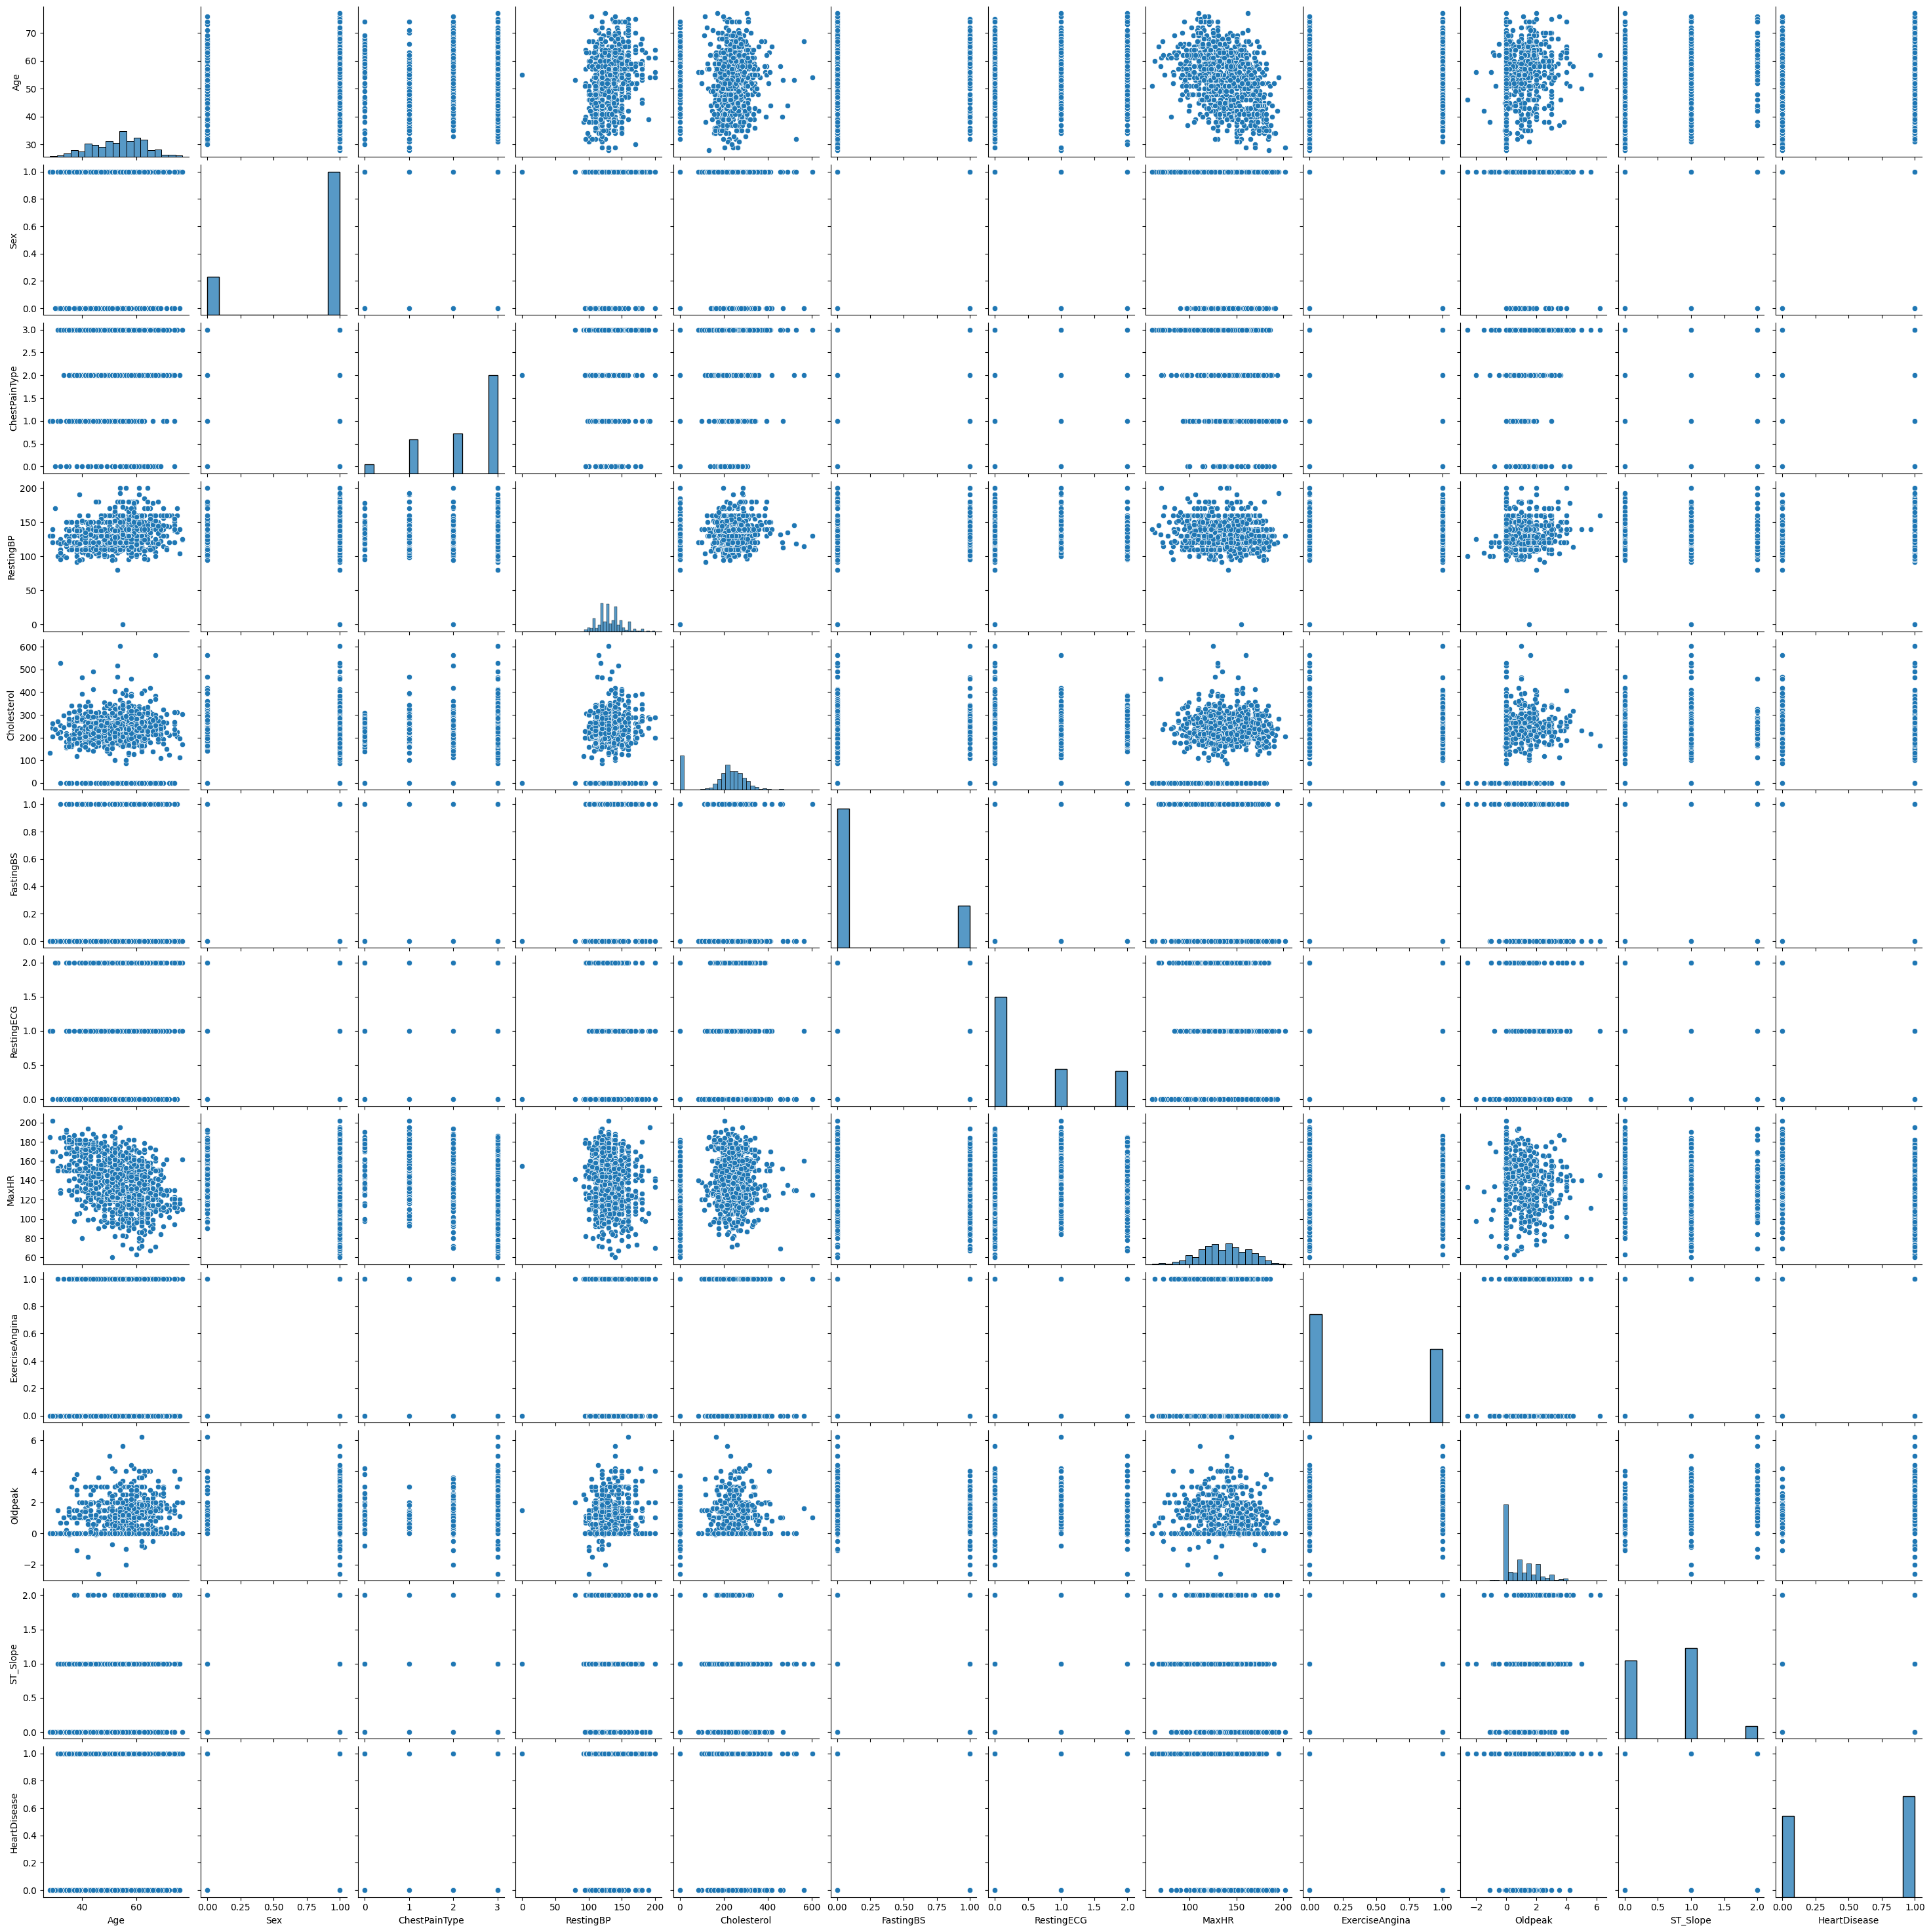

In [37]:
sns.pairplot(data)

<Axes: xlabel='HeartDisease', ylabel='Count'>

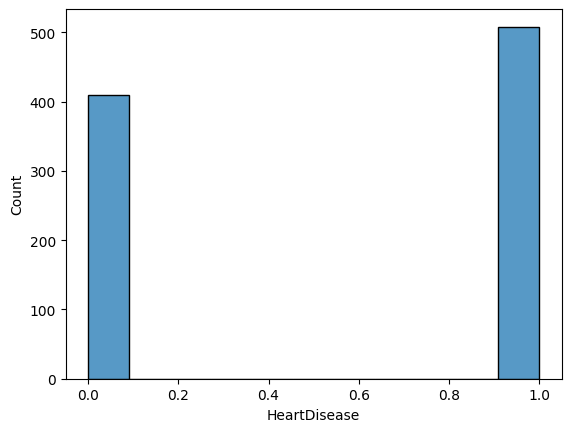

In [27]:
sns.histplot(data['HeartDisease'])

<Axes: >

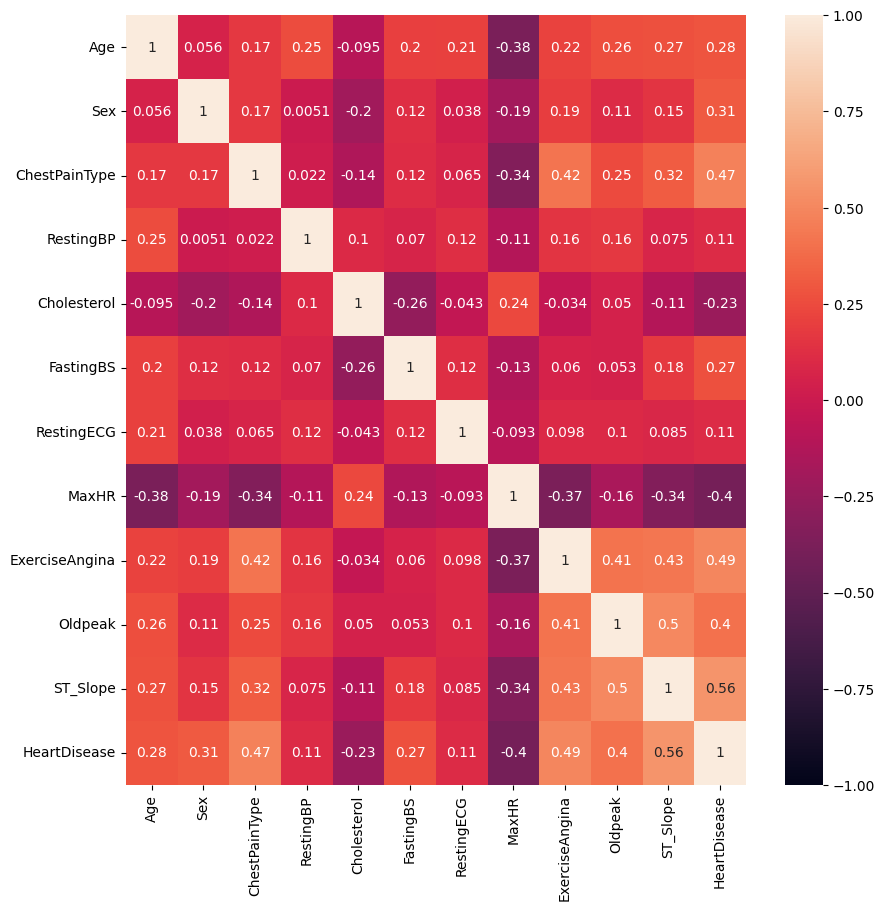

In [36]:
j=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(j,vmin=-1,annot=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(data.drop('HeartDisease',axis=1),data['HeartDisease'],test_size=0.2,random_state=42,stratify=data['HeartDisease'])
sc=StandardScaler()
cl=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
x_train[cl]=sc.fit_transform(x_train[cl])
x_test[cl]=sc.transform(x_test[cl])

In [32]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
485,0.970012,1,1.0,0.339016,0.127137,1,2.0,-0.324520,1,0.317046,1.0
486,0.122028,1,1.0,-1.266031,0.099443,1,2.0,1.689837,0,-0.440356,0.0
117,0.546020,0,3.0,-0.159102,1.244113,1,2.0,-0.247045,1,0.601071,1.0
361,-0.725956,1,3.0,1.501291,-1.876035,0,0.0,-0.479470,1,-0.819056,1.0
296,-0.407962,1,3.0,0.671094,-1.876035,1,0.0,0.101594,1,-0.156330,1.0
...,...,...,...,...,...,...,...,...,...,...,...
276,-0.301964,1,2.0,0.117630,-0.399042,0,0.0,0.527708,0,1.074447,1.0
201,-0.831954,1,2.0,-0.712567,0.247142,0,0.0,0.527708,0,-0.819056,0.0
462,0.546020,1,3.0,-0.601874,0.274836,0,0.0,-0.750634,1,0.411721,2.0
252,0.758016,1,3.0,-0.435834,0.819477,0,2.0,-0.828109,1,-0.819056,0.0


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lg=RandomForestClassifier()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8913043478260869
